<h2>Cramér-von Mises</h2>

In [14]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt    

In [69]:
def discrete_approx_cramer_von_mises(F_inv, k):
    p = np.array([1 for i in range(k)])/k
    x = np.array([F_inv((2*i-1)/2/k) for i in range(1,k+1)])
    eta = (x,p)
    return eta 

In [131]:
N = 30
data = discrete_approx_cramer_von_mises(stats.norm.ppf,N)

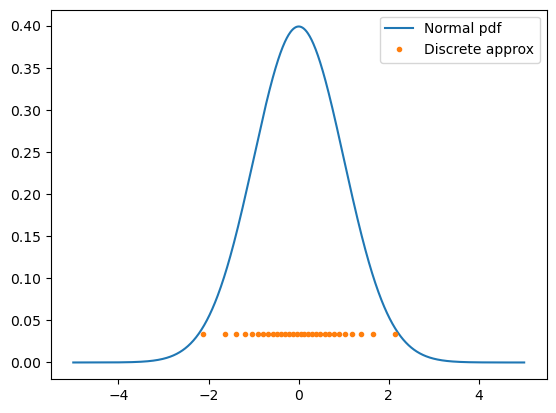

In [132]:
ax = plt.axes()
ax.plot(np.linspace(-5,5,1000),stats.norm.pdf(np.linspace(-5,5,1000)), label = 'Normal pdf')
ax.plot(data[0],data[1], '.', label="Discrete approx")
ax.legend()

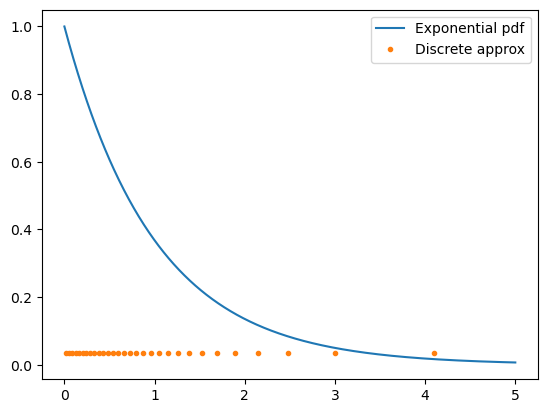

In [91]:
N = 30
data = discrete_approx_cramer_von_mises(stats.expon.ppf,N)
ax = plt.axes()
ax.plot(np.linspace(0,5,1000),stats.expon.pdf(np.linspace(0,5,1000)), label = 'Exponential pdf')
ax.plot(data[0],data[1], '.', label="Discrete approx")
ax.legend()

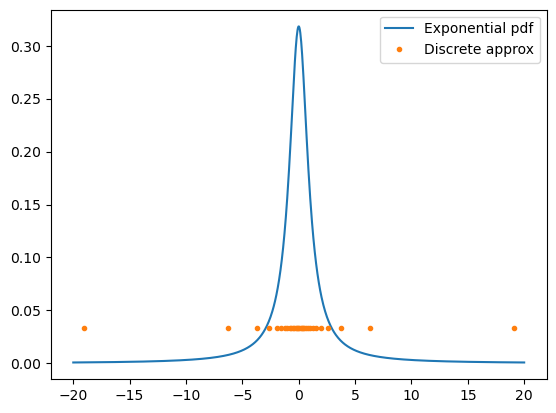

In [94]:
N = 30
data = discrete_approx_cramer_von_mises(stats.cauchy.ppf,N)
ax = plt.axes()
ax.plot(np.linspace(-20,20,1000),stats.cauchy.pdf(np.linspace(-20,20,1000)), label = 'Exponential pdf')
ax.plot(data[0],data[1], '.', label="Discrete approx")
ax.legend()

<h2>Anderson-Darling</h2>

In [124]:
def discrete_approx_anderson_darling(F_inv, k, eps_max):
    eps = 1
    q = np.array([(2*i-1)/2/k for i in range(1,k+1)])
    Q = np.array([i/k for i in range(1,k+1)])
    oldp = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
    while (eps > eps_max):
        q = np.concatenate(([Q[0]/2],np.array([(Q[i-2]+Q[i-1])/2 for i in range(2,k+1)])))
        Q = np.concatenate((np.array([np.log((1-q[i-1])/(1-q[i]))/np.log(q[i]*(1-q[i-1])/q[i-1]/(1-q[i])) for i in range(1,k)]),[1]))
        newp = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
        eps = np.max(np.abs(np.ptp([oldp,newp],axis=0)))
        oldp = newp.copy()
    p = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
    x = np.array([F_inv(q[i-1]) for i in range(1,k+1)])
    eta = (x,p)
    return eta 

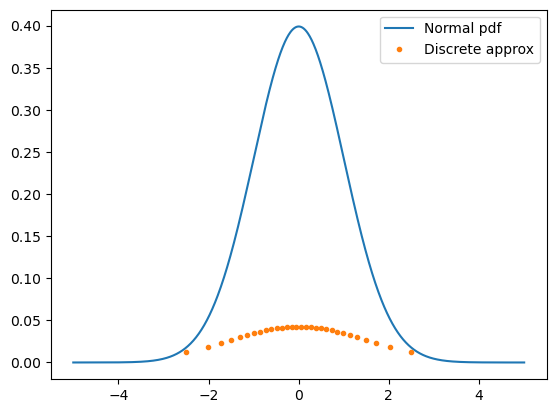

In [133]:
N = 30
data = discrete_approx_anderson_darling(stats.norm.ppf,N,10**(-10))
ax = plt.axes()
ax.plot(np.linspace(-5,5,1000),stats.norm.pdf(np.linspace(-5,5,1000)), label = 'Normal pdf')
ax.plot(data[0],data[1], '.', label="Discrete approx")
ax.legend()

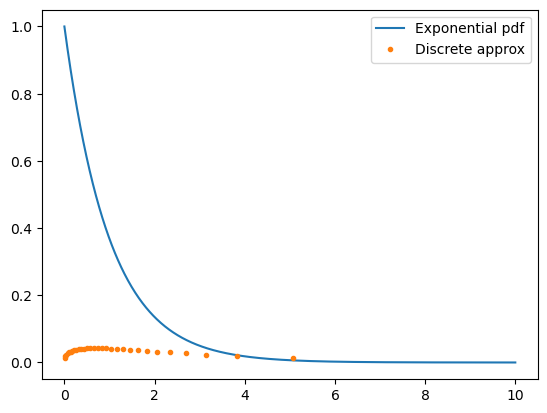

In [134]:
N = 30
data = discrete_approx_anderson_darling(stats.expon.ppf,N,10**(-10))
ax = plt.axes()
ax.plot(np.linspace(0,10,1000),stats.expon.pdf(np.linspace(0,10,1000)), label = 'Exponential pdf')
ax.plot(data[0],data[1], '.', label="Discrete approx")
ax.legend()

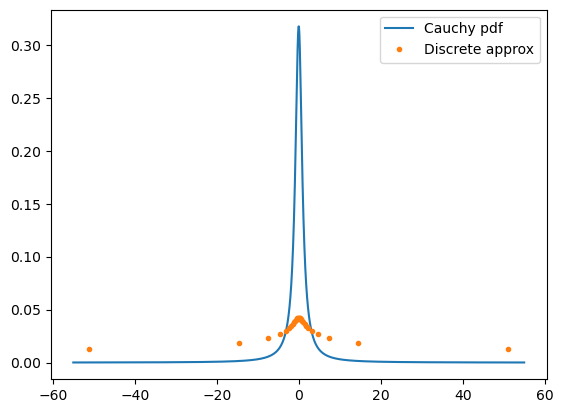

In [140]:
N = 30
data = discrete_approx_anderson_darling(stats.cauchy.ppf,N,10**(-10))
ax = plt.axes()
ax.plot(np.linspace(-55,55,1000),stats.cauchy.pdf(np.linspace(-55,55,1000)), label = 'Cauchy pdf')
ax.plot(data[0],data[1], '.', label="Discrete approx")
ax.legend()

<h2>Cramér</h2>

We implement Cramer for each of the following distributions separately

<h3>Normal</h3>

In [153]:
import scipy.stats as stats
def discrete_approx_cramer_normal(k, eps_max):
    F_inv = stats.norm.ppf
    f = stats.norm.pdf
    eps = 1
    q = np.array([(2*i-1)/2/k for i in range(1,k+1)])
    Q = np.array([i/k for i in range(1,k+1)])
    oldp = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
    while (eps > eps_max):
        q = np.concatenate(([Q[0]/2],np.array([(Q[i-2]+Q[i-1])/2 for i in range(2,k+1)])))
        Q = np.array([(F_inv(q[i])*q[i]+f(F_inv(q[i])) - F_inv(q[i-1])*q[i-1]-f(F_inv(q[i-1])))/(F_inv(q[i]) - F_inv(q[i-1])) for i in range(1,k)] + [1])
        newp = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
        eps = np.max(np.abs(np.ptp([oldp,newp],axis=0)))
        oldp = newp.copy()
    p = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
    x = np.array([F_inv(q[i-1]) for i in range(1,k+1)])
    eta = (x,p)
    return eta 

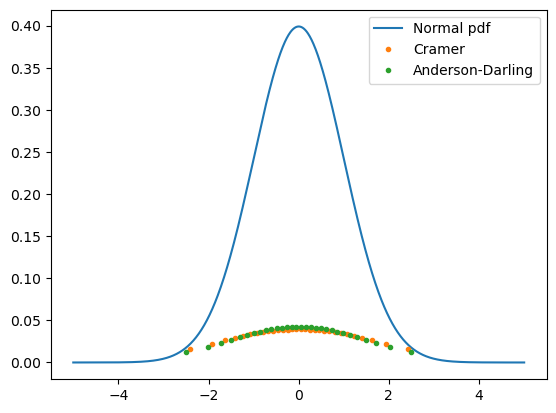

In [156]:
N = 30
data = discrete_approx_cramer_normal(N,10**(-5))
ax = plt.axes()
ax.plot(np.linspace(-5,5,1000),stats.norm.pdf(np.linspace(-5,5,1000)), label = 'Normal pdf')
ax.plot(data[0],data[1], '.', label="Cramer")
data = discrete_approx_anderson_darling(stats.norm.ppf,N,10**(-10))
ax.plot(data[0],data[1], '.', label="Anderson-Darling")
ax.legend()

<h3>Exponential</h3>

In [178]:
import scipy.stats as stats
def discrete_approx_cramer_exponential(F_inv, k, eps_max):
    f = stats.expon.pdf
    eps = 1
    q = np.array([(2*i-1)/2/k for i in range(1,k+1)])
    Q = np.array([i/k for i in range(1,k+1)])
    oldp = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
    while (eps > eps_max):
        q = np.concatenate(([Q[0]/2],np.array([(Q[i-2]+Q[i-1])/2 for i in range(2,k+1)])))
        Q = np.array([1-(q[i]-q[i-1])/np.log((1-q[i-1])/(1-q[i])) for i in range(1,k)] + [1])
        newp = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
        eps = np.max(np.abs(np.ptp([oldp,newp],axis=0)))
        oldp = newp.copy()
    p = np.array([Q[0]] + [Q[i-1]-Q[i-2] for i in range(2,k+1)])
    x = np.array([F_inv(q[i-1]) for i in range(1,k+1)])
    eta = (x,p)
    return eta 

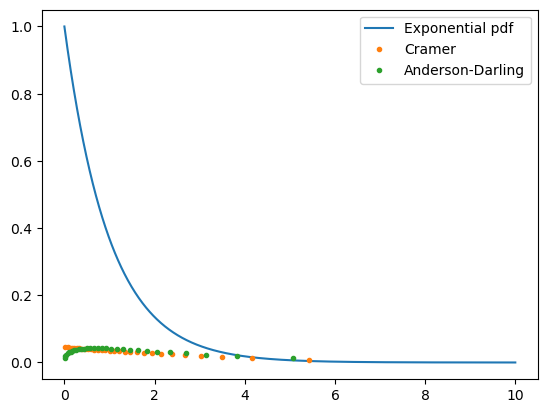

In [179]:
N = 30
data = discrete_approx_cramer_exponential(stats.expon.ppf, N,10**(-5))
ax = plt.axes()
ax.plot(np.linspace(0,10,1000),stats.expon.pdf(np.linspace(0,10,1000)), label = 'Exponential pdf')
ax.plot(data[0],data[1], '.', label="Cramer")
data = discrete_approx_anderson_darling(stats.expon.ppf,N,10**(-10))
ax.plot(data[0],data[1], '.', label="Anderson-Darling")
ax.legend()

As noted in the paper, we can see that pmf for the discrete distribution from the Cramer distance is decreasing.